<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week12.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Two-body problems and Gravitational Forces -->

# PHY321: Two-body problems and Gravitational Forces
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **March 27-31, 2023**

## Aims and Overarching Motivation of week March 27-31

### Monday March 27

1. [Computational topics: functions and classes and how to use these in our course](https://github.com/mhjensen/Physics321/blob/master/doc/Codes/ClassicalMechanicsSolvers/WritingReusableCode.ipynb).

2. Discussion of the two-dimensional harmonic oscillator as a warm-up  to the gravitational force problem and Kepler's laws. This is relevant for homework 8 and exercises 2 and 3.

  * [See video TBA, jupyter-notebook part](https://youtu.be/)

  * [See handwritten notes as well](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2022/NotesMarch27.pdf)

**Reading suggestion**: Taylor section 8.4 and Lecture notes

### Wednesday March 29

1. Elliptical orbits and Kepler's laws

  * [Video of lecture TBA](https://youtu.be/)

  * [Handwritten notes](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2022/NotesMarch30.pdf)

**Reading suggestion**: Taylor sections  8.5-8.8

### Friday March 31

1. Physical interpretation of various orbit types and discussion of homework 8.  We will use parts of Friday for a regular lecture and thereafter work on homework 8.

  * [Video of lecture TBA](https://youtu.be/)

  * [Handwritten notes](https://github.com/mhjensen/Physics321/blob/master/doc/HandWrittenNotes/Spring2022/NotesApril1.pdf)

**Reading suggestion**: Taylor section 8.5-8.8

## Harmonic Oscillator in two dimensions, homework 8, exercises 2 and 3

*The material here is relevant for the discussion of exercises 2 and 3 for homework 8. It serves also as a warm-up for the more interesting gravitational force problem.*

Consider a particle of mass $m$ in a 2-dimensional harmonic oscillator with potential

$$
V=\frac{1}{2}kr^2=\frac{1}{2}k(x^2+y^2).
$$

If the orbit has angular momentum $L$, we can find the radius and angular velocity of the circular orbit as well as the b) the angular frequency of small radial perturbations.

We consider the effective potential. The radius of a circular orbit is at the minimum of the potential (where the effective force is zero).
The potential is plotted here with the parameters $k=m=0.1$ and $L=1.0$.

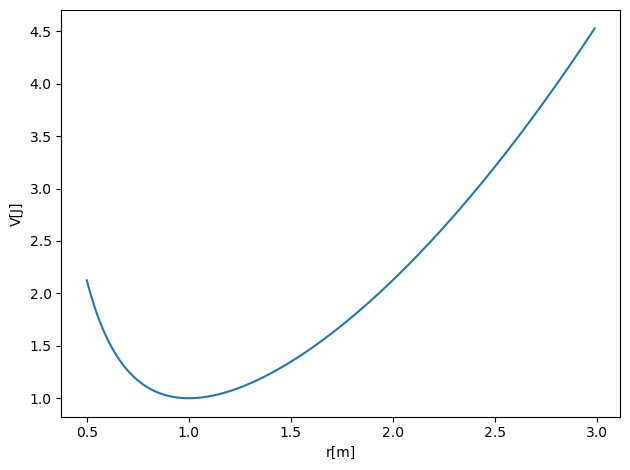

In [10]:
%matplotlib inline

# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.5
xfinal = 3.0
k = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = 0.5*k*x*x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

$$
\begin{eqnarray*}
V_{\rm eff}&=&\frac{1}{2}kr^2+\frac{L^2}{2mr^2}
\end{eqnarray*}
$$

## Harmonic oscillator in two dimensions and effective potential
The effective potential looks like that of a harmonic oscillator for
large $r$, but for small $r$, the centrifugal potential repels the
particle from the origin. The combination of the two potentials has a
minimum for at some radius $r_{\rm min}$.

$$
\begin{eqnarray*}
0&=&kr_{\rm min}-\frac{L^2}{mr_{\rm min}^3},\\
r_{\rm min}&=&\left(\frac{L^2}{mk}\right)^{1/4},\\
\dot{\theta}&=&\frac{L}{mr_{\rm min}^2}=\sqrt{k/m}.
\end{eqnarray*}
$$

For particles at $r_{\rm min}$ with $\dot{r}=0$, the particle does not
accelerate and $r$ stays constant, i.e. a circular orbit. The radius
of the circular orbit can be adjusted by changing the angular momentum
$L$.

For the above parameters this minimum is at $r_{\rm min}=1$.

 Now consider small vibrations about $r_{\rm min}$. The effective spring constant is the curvature of the effective potential.

$$
\begin{eqnarray*}
k_{\rm eff}&=&\left.\frac{d^2}{dr^2}V_{\rm eff}(r)\right|_{r=r_{\rm min}}=k+\frac{3L^2}{mr_{\rm min}^4}\\
&=&4k,\\
\omega&=&\sqrt{k_{\rm eff}/m}=2\sqrt{k/m}=2\dot{\theta}.
\end{eqnarray*}
$$

Because the radius oscillates with twice the angular frequency,
the orbit has two places where $r$ reaches a minimum in one
cycle. This differs from the inverse-square force where there is one
minimum in an orbit. One can show that the orbit for the harmonic
oscillator is also elliptical, but in this case the center of the
potential is at the center of the ellipse, not at one of the foci.

The solution is also simple to write down exactly in Cartesian coordinates. The $x$ and $y$ equations of motion separate,

$$
\begin{eqnarray*}
\ddot{x}&=&-kx,\\
\ddot{y}&=&-ky.
\end{eqnarray*}
$$

The general solution can be expressed as

$$
\begin{eqnarray*}
x&=&A\cos\omega_0 t+B\sin\omega_0 t,\\
y&=&C\cos\omega_0 t+D\sin\omega_0 t.
\end{eqnarray*}
$$

The code here finds the solution for $x$ and $y$ using the code we
developed in homework 5 and 6 and the midterm.  Note that this code is
tailored to run in Cartesian coordinates. There is thus no angular
momentum dependent term.

Here we have chose initial conditions that
correspond to the minimum of the effective potential
$r_{\mathrm{min}}$. We have chosen $x_0=r_{\mathrm{min}}$ and
$y_0=0$. Similarly, we use the centripetal acceleration to determine
the initial velocity so that we have a circular motion (see back to the
last question of the midterm). This means that we set the centripetal
acceleration $v^2/r$ equal to the force from the harmonic oscillator $-k\boldsymbol{r}$. Taking the
magnitude of $\boldsymbol{r}$ we have then
$v^2/r=k/mr$, which gives $v=\pm\omega_0r$. 

Since the code here solves the equations of motion in cartesian
coordinates and the harmonic oscillator potential leads to forces in
the $x$- and $y$-directions that are decoupled, we have to select the initial velocities and positions so that we don't get that for example $y(t)=0$.

We set $x_0$ to be different from zero and $v_{y0}$ to be different from zero.

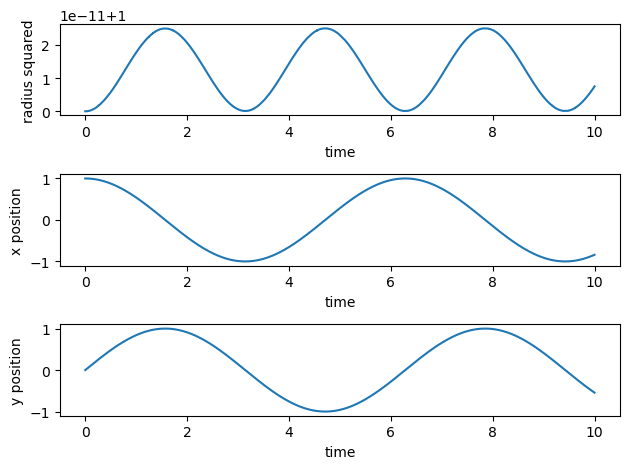

In [12]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


DeltaT = 0.00001
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
radius = np.zeros(n)
# Constants of the model
k = 1.0   # spring constant
m = 1.0   # mass, you can change these
omega02 = k/m  # Frequency
AngMom = 1.0  #  The angular momentum
# Potential minimum
rmin = (AngMom*AngMom/k/m)**0.25
# Initial conditions as compact 2-dimensional arrays, x0=rmin and y0 = 0
x0 = rmin; y0= 0.0
r0 = np.array([x0,y0])
vy0 = sqrt(omega02)*rmin; vx0 = 0.0
v0 = np.array([vx0,vy0])
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    a =  -r[i]*omega02  
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -r[i+1]*omega02  
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
radius = np.sqrt(r[:,0]**2+r[:,1]**2)
fig, ax = plt.subplots(3,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius squared')
ax[0].plot(t,r[:,0]**2+r[:,1]**2)
ax[1].set_xlabel('time')
ax[1].set_ylabel('x position')
ax[1].plot(t,r[:,0])
ax[2].set_xlabel('time')
ax[2].set_ylabel('y position')
ax[2].plot(t,r[:,1])

fig.tight_layout()
save_fig("2DimHOVV")
plt.show()

We see that the radius (to within a given error), we obtain a constant radius.

The following code shows first how we can solve this problem using the radial degrees of freedom only.
Here we need to add the explicit centrifugal barrier.  Note that the variable $r$ depends only on time. There is no $x$ and $y$ directions
since we have transformed the equations to polar coordinates.

In [3]:
DeltaT = 0.01
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
E = np.zeros(n)
# Constants of the model
AngMom = 1.0  #  The angular momentum
m = 1.0
k = 1.0
omega02 = k/m
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/k/m)**0.25
# Initial conditions
r0 = rmin
v0 = 0.0
r[0] = r0
v[0] = v0
E[0] = 0.5*m*v0*v0+0.5*k*r0*r0+0.5*c2/(r0*r0)
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -r[i]*omega02+c1/(r[i]**3)    
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -r[i+1]*omega02+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    E[i+1] = 0.5*m*v[i+1]*v[i+1]+0.5*k*r[i+1]*r[i+1]+0.5*c2/(r[i+1]*r[i+1])
    # Plot position as function of time
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Energy')
ax[1].plot(t,E)
save_fig("RadialHOVV")
plt.show()

With some work using double angle formulas, one can calculate

$$
\begin{eqnarray*}
r^2&=&x^2+y^2\\
\nonumber
&=&(A^2+C^2)\cos^2(\omega_0t)+(B^2+D^2)\sin^2\omega_0t+(AB+CD)\cos(\omega_0t)\sin(\omega_0t)\\
\nonumber
&=&\alpha+\beta\cos 2\omega_0 t+\gamma\sin 2\omega_0 t,\\
\alpha&=&\frac{A^2+B^2+C^2+D^2}{2},~~\beta=\frac{A^2-B^2+C^2-D^2}{2},~~\gamma=AB+CD,\\
r^2&=&\alpha+(\beta^2+\gamma^2)^{1/2}\cos(2\omega_0 t-\delta),~~~\delta=\arctan(\gamma/\beta),
\end{eqnarray*}
$$

and see that radius oscillates with frequency $2\omega_0$. The
factor of two comes because the oscillation $x=A\cos\omega_0t$ has two
maxima for $x^2$, one at $t=0$ and one a half period later.

## Ellipse reminder

Let us remind ourselves about what an ellipse is before we proceed.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

## Deriving Elliptical Orbits

Kepler's laws state that a gravitational orbit should be an ellipse
with the source of the gravitational field at one focus. Deriving this
is surprisingly messy. To do this, we first use angular momentum
conservation to transform the equations of motion so that it is in
terms of $r$ and $\theta$ instead of $r$ and $t$. The overall strategy
is to

1. Find equations of motion for $r$ and $t$ with no angle ($\theta$) mentioned, i.e. $d^2r/dt^2=\cdots$. Angular momentum conservation will be used, and the equation will involve the angular momentum $L$.

2. Use angular momentum conservation to find an expression for $\dot{\theta}$ in terms of $r$.

3. Use the chain rule to convert the equations of motions for $r$, an expression involving $r,\dot{r}$ and $\ddot{r}$, to one involving $r,dr/d\theta$ and $d^2r/d\theta^2$. This is quitecomplicated because the expressions will also involve a substitution $u=1/r$ so that one finds an expression in terms of $u$ and $\theta$.

4. Once $u(\theta)$ is found, you need to show that this can be converted to the familiar form for an ellipse.

The equations of motion give

<!-- Equation labels as ordinary links -->
<div id="eq:radialeqofmotion"></div>

$$
\begin{eqnarray}
\label{eq:radialeqofmotion} \tag{1}
\frac{d}{dt}r^2&=&\frac{d}{dt}(x^2+y^2)=2x\dot{x}+2y\dot{y}=2r\dot{r},\\
\nonumber
\dot{r}&=&\frac{x}{r}\dot{x}+\frac{y}{r}\dot{y},\\
\nonumber
\ddot{r}&=&\frac{x}{r}\ddot{x}+\frac{y}{r}\ddot{y}
+\frac{\dot{x}^2+\dot{y}^2}{r}
-\frac{\dot{r}^2}{r}.
\end{eqnarray}
$$

Recognizing that the numerator of the third term is the velocity squared, and that it can be written in polar coordinates,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
v^2=\dot{x}^2+\dot{y}^2=\dot{r}^2+r^2\dot{\theta}^2,
\label{_auto1} \tag{2}
\end{equation}
$$

one can write $\ddot{r}$ as

<!-- Equation labels as ordinary links -->
<div id="eq:radialeqofmotion2"></div>

$$
\begin{eqnarray}
\label{eq:radialeqofmotion2} \tag{3}
\ddot{r}&=&\frac{F_x\cos\theta+F_y\sin\theta}{m}+\frac{\dot{r}^2+r^2\dot{\theta}^2}{r}-\frac{\dot{r}^2}{r}\\
\nonumber
&=&\frac{F}{m}+\frac{r^2\dot{\theta}^2}{r}\\
\nonumber
m\ddot{r}&=&F+\frac{L^2}{mr^3}.
\end{eqnarray}
$$

This derivation used the fact that the force was radial,
$F=F_r=F_x\cos\theta+F_y\sin\theta$, and that angular momentum is
$L=mrv_{\theta}=mr^2\dot{\theta}$. The term $L^2/mr^3=mv^2/r$ behaves
like an additional force. Sometimes this is referred to as a
centrifugal force, but it is not a force. Instead, it is the
consequence of considering the motion in a rotating (and therefore
accelerating) frame.

Now, we switch to the particular case of an attractive inverse square
force, $F=-\alpha/r^2$, and show that the trajectory, $r(\theta)$, is
an ellipse. To do this we transform derivatives w.r.t. time to
derivatives w.r.t. $\theta$ using the chain rule combined with angular
momentum conservation, $\dot{\theta}=L/mr^2$.

<!-- Equation labels as ordinary links -->
<div id="eq:rtotheta"></div>

$$
\begin{eqnarray}
\label{eq:rtotheta} \tag{4}
\dot{r}&=&\frac{dr}{d\theta}\dot{\theta}=\frac{dr}{d\theta}\frac{L}{mr^2},\\
\nonumber
\ddot{r}&=&\frac{d^2r}{d\theta^2}\dot{\theta}^2
+\frac{dr}{d\theta}\left(\frac{d}{dr}\frac{L}{mr^2}\right)\dot{r}\\
\nonumber
&=&\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-2\frac{dr}{d\theta}\frac{L}{mr^3}\dot{r}\\
\nonumber
&=&\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-\frac{2}{r}\left(\frac{dr}{d\theta}\right)^2\left(\frac{L}{mr^2}\right)^2
\end{eqnarray}
$$

Equating the two expressions for $\ddot{r}$ in Eq.s ([3](#eq:radialeqofmotion2)) and ([4](#eq:rtotheta)) eliminates all the derivatives w.r.t. time, and provides a differential equation with only derivatives w.r.t. $\theta$,

<!-- Equation labels as ordinary links -->
<div id="eq:rdotdot"></div>

$$
\begin{equation}
\label{eq:rdotdot} \tag{5}
\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-\frac{2}{r}\left(\frac{dr}{d\theta}\right)^2\left(\frac{L}{mr^2}\right)^2
=\frac{F}{m}+\frac{L^2}{m^2r^3},
\end{equation}
$$

that when solved yields the trajectory, i.e. $r(\theta)$. Up to this
point the expressions work for any radial force, not just forces that
fall as $1/r^2$.

The trick to simplifying this differential equation for the inverse
square problems is to make a substitution, $u\equiv 1/r$, and rewrite
the differential equation for $u(\theta)$.

$$
\begin{eqnarray}
r&=&1/u,\\
\nonumber
\frac{dr}{d\theta}&=&-\frac{1}{u^2}\frac{du}{d\theta},\\
\nonumber
\frac{d^2r}{d\theta^2}&=&\frac{2}{u^3}\left(\frac{du}{d\theta}\right)^2-\frac{1}{u^2}\frac{d^2u}{d\theta^2}.
\end{eqnarray}
$$

Plugging these expressions into Eq. ([5](#eq:rdotdot)) gives an
expression in terms of $u$, $du/d\theta$, and $d^2u/d\theta^2$. After
some tedious algebra,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\frac{d^2u}{d\theta^2}=-u-\frac{F m}{L^2u^2}.
\label{_auto2} \tag{6}
\end{equation}
$$

For the attractive inverse square law force, $F=-\alpha u^2$,

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\frac{d^2u}{d\theta^2}=-u+\frac{m\alpha}{L^2}.
\label{_auto3} \tag{7}
\end{equation}
$$

The solution has two arbitrary constants, $A$ and $\theta_0$,

<!-- Equation labels as ordinary links -->
<div id="eq:Ctrajectory"></div>

$$
\begin{eqnarray}
\label{eq:Ctrajectory} \tag{8}
u&=&\frac{m\alpha}{L^2}+A\cos(\theta-\theta_0),\\
\nonumber
r&=&\frac{1}{(m\alpha/L^2)+A\cos(\theta-\theta_0)}.
\end{eqnarray}
$$

The radius will be at a minimum when $\theta=\theta_0$ and at a
maximum when $\theta=\theta_0+\pi$. The constant $A$ is related to the
eccentricity of the orbit. When $A=0$ the radius is a constant
$r=L^2/(m\alpha)$, and the motion is circular. If one solved the
expression $mv^2/r=-\alpha/r^2$ for a circular orbit, using the
substitution $v=L/(mr)$, one would reproduce the expression
$r=L^2/(m\alpha)$.

The form describing the elliptical trajectory in
Eq. ([8](#eq:Ctrajectory)) can be identified as an ellipse with one
focus being the center of the ellipse by considering the definition of
an ellipse as being the points such that the sum of the two distances
between the two foci are a constant. Making that distance $2D$, the
distance between the two foci as $2a$, and putting one focus at the
origin,

$$
\begin{eqnarray}
2D&=&r+\sqrt{(r\cos\theta-2a)^2+r^2\sin^2\theta},\\
\nonumber
4D^2+r^2-4Dr&=&r^2+4a^2-4ar\cos\theta,\\
\nonumber
r&=&\frac{D^2-a^2}{D+a\cos\theta}=\frac{1}{D/(D^2-a^2)-a\cos\theta/(D^2-a^2)}.
\end{eqnarray}
$$

By inspection, this is the same form as Eq. ([8](#eq:Ctrajectory)) with $D/(D^2-a^2)=m\alpha/L^2$ and $a/(D^2-a^2)=A$.

Let us remind ourselves about what an ellipse is before we proceed.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

## Effective or Centrifugal Potential

The total energy of a particle is

$$
\begin{eqnarray}
E&=&V(r)+\frac{1}{2}mv_\theta^2+\frac{1}{2}m\dot{r}^2\\
\nonumber
&=&V(r)+\frac{1}{2}mr^2\dot{\theta}^2+\frac{1}{2}m\dot{r}^2\\
\nonumber
&=&V(r)+\frac{L^2}{2mr^2}+\frac{1}{2}m\dot{r}^2.
\end{eqnarray}
$$

The second term then contributes to the energy like an additional
repulsive potential. The term is sometimes referred to as the
"centrifugal" potential, even though it is actually the kinetic energy
of the angular motion. Combined with $V(r)$, it is sometimes referred
to as the "effective" potential,

$$
\begin{eqnarray}
V_{\rm eff}(r)&=&V(r)+\frac{L^2}{2mr^2}.
\end{eqnarray}
$$

Note that if one treats the effective potential like a real potential, one would expect to be able to generate an effective force,

$$
\begin{eqnarray}
F_{\rm eff}&=&-\frac{d}{dr}V(r) -\frac{d}{dr}\frac{L^2}{2mr^2}\\
\nonumber
&=&F(r)+\frac{L^2}{mr^3}=F(r)+m\frac{v_\perp^2}{r},
\end{eqnarray}
$$

which is indeed matches the form for $m\ddot{r}$ in Eq. ([3](#eq:radialeqofmotion2)), which included the **centrifugal** force.

The following code plots this effective potential for a simple choice of parameters, with a standard gravitational potential $-\alpha/r$. Here we have chosen $L=m=\alpha=1$.

In [6]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
alpha = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = -alpha/x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

### Gravitational force example

Using the above parameters, we can now study the evolution of the system using for example the velocity Verlet method.
This is done in the code here for an initial radius equal to the minimum of the potential well.  We seen then that the radius is always the same and corresponds to a circle (the radius is always constant).

In [7]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


# Simple Gravitational Force   -alpha/r
    
DeltaT = 0.01
#set up arrays 
tfinal = 100.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
alpha = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/alpha)
# Initial conditions
r0 = rmin
v0 = 0.0
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -alpha/(r[i]**2)+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -alpha/(r[i+1]**2)+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    # Plot position as function of time
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Velocity')
ax[1].plot(t,v)
save_fig("RadialGVV")
plt.show()

Changing the value of the initial position to a value where the energy is positive, leads to an increasing radius with time, a so-called unbound orbit. Choosing on the other hand an initial radius that corresponds to a negative energy and different from the minimum value leads to a radius that oscillates back and forth between two values.